# Malan Moody

## Final 01

In this project, we create 1D feature vectors of centroid distances for 20 different binary images and perform both template-based and feature-based matching on them

There are 5 image classes, each with 4 images. The 5 classes are apple, bell, bone, brick, and face

## Computing 1D Feature Vectors

We first read in each binary image

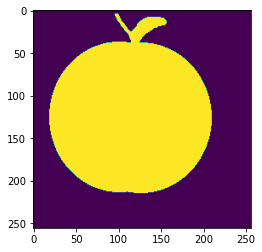

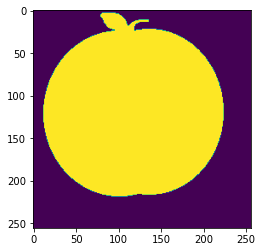

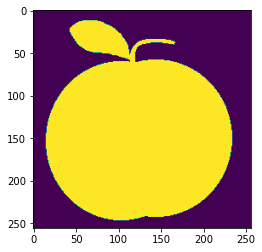

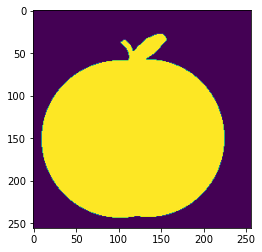

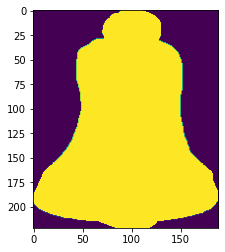

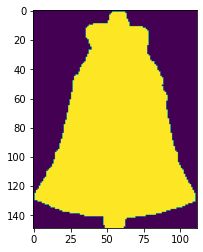

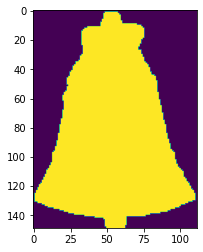

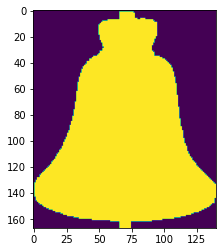

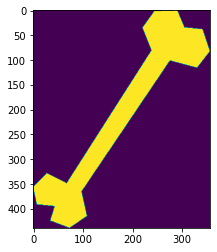

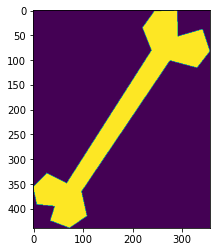

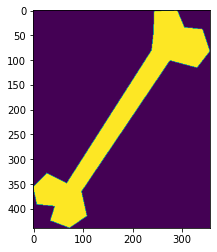

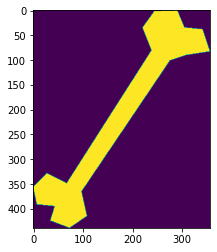

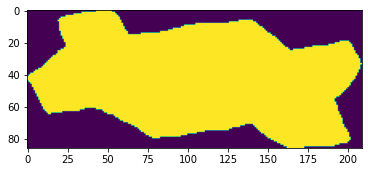

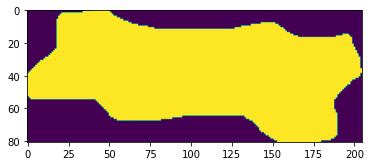

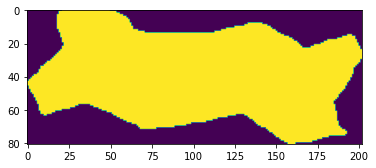

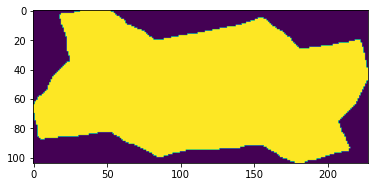

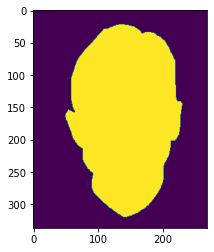

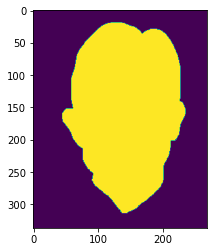

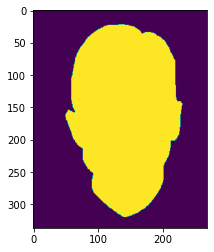

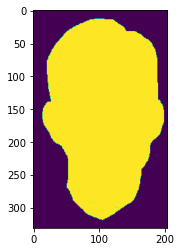

In [1]:
from PIL import Image, ImageFilter, ImageChops
import math
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

#read in each image as a binary image
i1c1 = cv.imread("images/apple1.jpg", 0)
i2c1 = cv.imread("images/apple2.jpg", 0)
i3c1 = cv.imread("images/apple3.jpg", 0)
i4c1 = cv.imread("images/apple4.jpg", 0)

i1c2 = cv.imread("images/bell1.jpg", 0)
i2c2 = cv.imread("images/bell2.jpg", 0)
i3c2 = cv.imread("images/bell3.jpg", 0)
i4c2 = cv.imread("images/bell4.jpg", 0)

i1c3 = cv.imread("images/bone1.jpg", 0)
i2c3 = cv.imread("images/bone2.jpg", 0)
i3c3 = cv.imread("images/bone3.jpg", 0)
i4c3 = cv.imread("images/bone4.jpg", 0)

i1c4 = cv.imread("images/brick1.jpg", 0)
i2c4 = cv.imread("images/brick2.jpg", 0)
i3c4 = cv.imread("images/brick3.jpg", 0)
i4c4 = cv.imread("images/brick4.jpg", 0)

i1c5 = cv.imread("images/face1.jpg", 0)
i2c5 = cv.imread("images/face2.jpg", 0)
i3c5 = cv.imread("images/face3.jpg", 0)
i4c5 = cv.imread("images/face4.jpg", 0)


ret,img1c1 = cv.threshold(i1c1,127,255,0)
ret,img2c1 = cv.threshold(i2c1,127,255,0)
ret,img3c1 = cv.threshold(i3c1,127,255,0)
ret,img4c1 = cv.threshold(i4c1,127,255,0)

ret,img1c2 = cv.threshold(i1c2,127,255,0)
ret,img2c2 = cv.threshold(i2c2,127,255,0)
ret,img3c2 = cv.threshold(i3c2,127,255,0)
ret,img4c2 = cv.threshold(i4c2,127,255,0)

ret,img1c3 = cv.threshold(i1c3,127,255,0)
ret,img2c3 = cv.threshold(i2c3,127,255,0)
ret,img3c3 = cv.threshold(i3c3,127,255,0)
ret,img4c3 = cv.threshold(i4c3,127,255,0)

ret,img1c4 = cv.threshold(i1c4,127,255,0)
ret,img2c4 = cv.threshold(i2c4,127,255,0)
ret,img3c4 = cv.threshold(i3c4,127,255,0)
ret,img4c4 = cv.threshold(i4c4,127,255,0)

ret,img1c5 = cv.threshold(i1c5,127,255,0)
ret,img2c5 = cv.threshold(i2c5,127,255,0)
ret,img3c5 = cv.threshold(i3c5,127,255,0)
ret,img4c5 = cv.threshold(i4c5,127,255,0)

imgs = [img1c1, img2c1, img3c1, img4c1, 
        img1c2, img2c2, img3c2, img4c2, 
        img1c3, img2c3, img3c3, img4c3,
        img1c4, img2c4, img3c4, img4c4,
        img1c5, img2c5, img3c5, img4c5]

for i in range(20):
    plt.figure()
    plt.imshow(imgs[i])

We next find the moments of each image, and use that to find each image's centroid

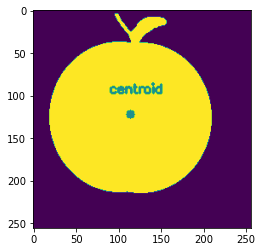

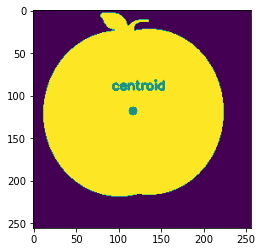

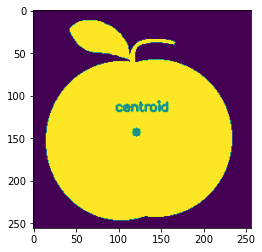

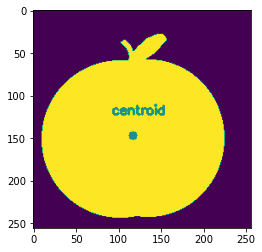

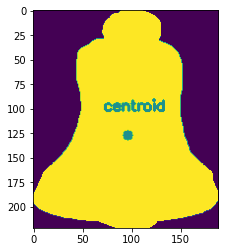

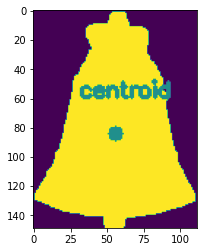

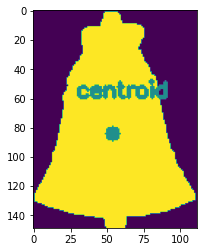

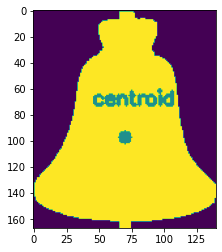

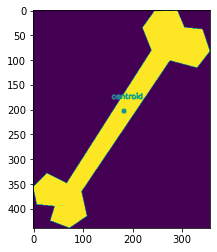

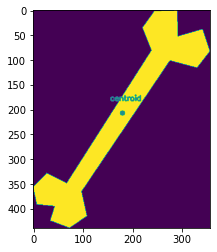

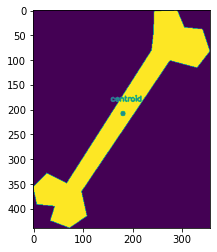

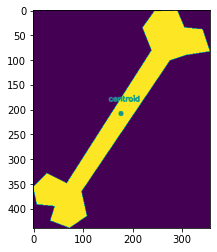

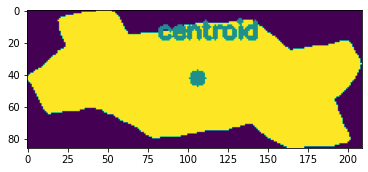

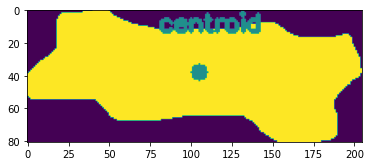

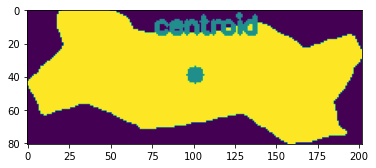

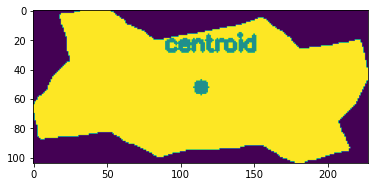

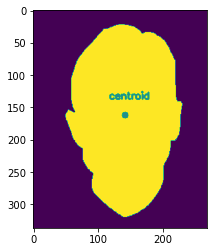

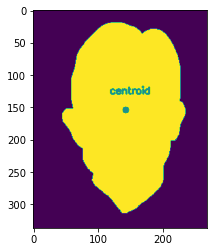

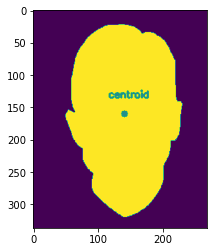

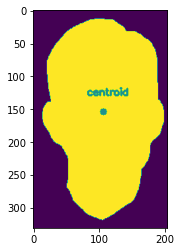

In [3]:
imgsLabeled = np.empty(20, dtype=object) 
cX = np.empty(20, dtype=object) 
cY = np.empty(20, dtype=object) 

for i in range(20):
    M = cv.moments(imgs[i])
    cX[i] = int(M["m10"] / M["m00"])
    cY[i] = int(M["m01"] / M["m00"])
    imgsLabeled[i] = imgs[i].copy()
    cv.circle(imgsLabeled[i], (cX[i], cY[i]), 5, (127, 127, 127), -1)
    cv.putText(imgsLabeled[i], "centroid", (cX[i] - 25, cY[i] - 25),cv.FONT_HERSHEY_SIMPLEX, 0.5, (127, 127, 127), 2)
    plt.figure()
    plt.imshow(imgsLabeled[i])

We then use Canny edge detection to get the edges of each image

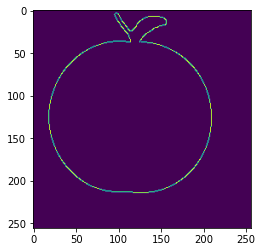

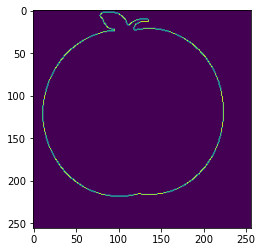

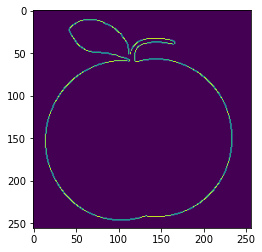

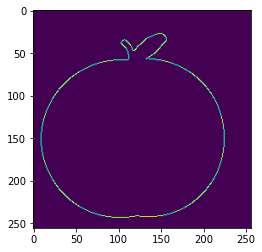

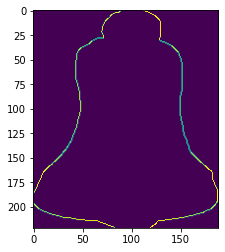

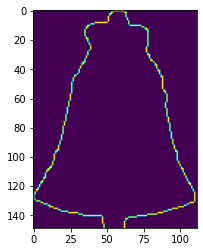

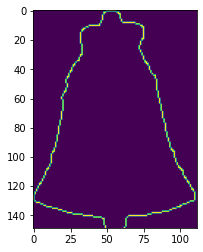

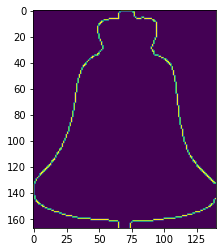

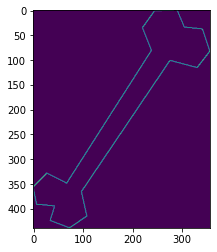

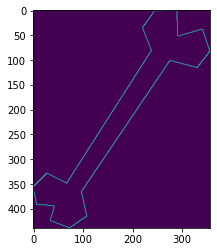

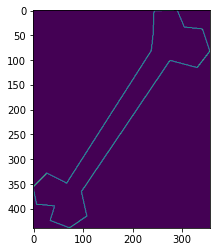

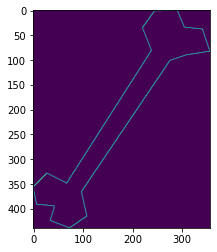

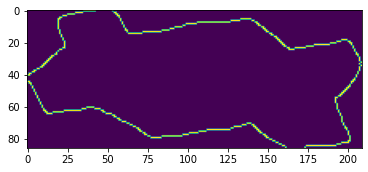

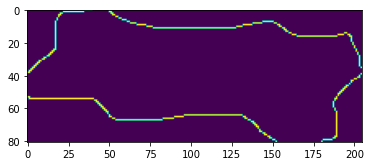

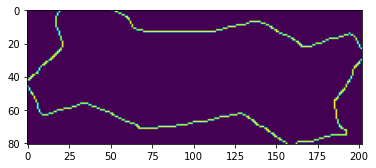

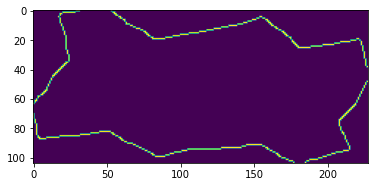

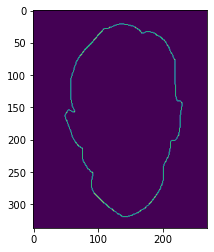

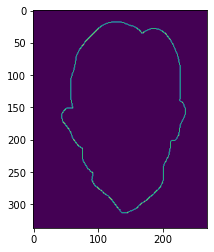

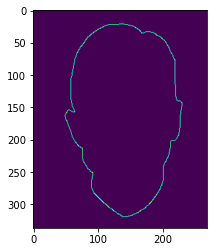

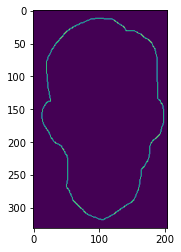

In [4]:
# Find the edges of each binary image
imgEdges = np.empty(20, dtype=object) 

for i in range(20):
    imgEdges[i] = cv.Canny(imgs[i],100,200)
    plt.figure()
    plt.imshow(imgEdges[i])

We then create a vector for each image to hold its edge coordinate points

In [5]:
# Create vectors to hold edge coordinates
edgeCoordinates = [ [] for _ in range(20) ]

# Find each edge pixel to centroid and add it to its respective vector

for i in range(20):
    for j in range(imgEdges[i].shape[0]):
        for k in range(imgEdges[i].shape[1]):
            if imgEdges[i][j,k] == 255:
                edgeCoordinates[i].append([j,k])

Next, we create vectors to hold the angles of each edge point to the centroid and sort both the edge point vectors and angle vectors by angle

In [6]:
# Create vectors to hold edge coordinate and centroid angles
angles = [ [] for _ in range(20) ]

# find angle of each line and sort edge coordinates by angle to centroid  
for i in range(20):
    for j in edgeCoordinates[i]:
        angles[i].append(math.atan2(j[0] - cY[i], j[1] - cX[i]))
    angles[i], edgeCoordinates[i] = (list(t) for t in zip(*sorted(zip(angles[i], edgeCoordinates[i]))))

We then use the sorted edge point vectors to find the 1D feature vector for each image

In [7]:
# Create 1D feature vectors
featureVectors = [ [] for _ in range(20) ]

# Find distance from each edge pixel to centroid and add it to feature vector
for i in range(20):
    for j in edgeCoordinates[i]:
        featureVectors[i].append(np.sqrt((j[0]-cY[i])**2 + (j[1]-cX[i])**2))

We plot a chart of each 1D feature vector

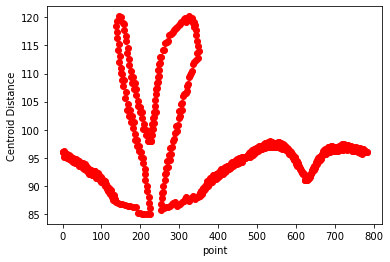

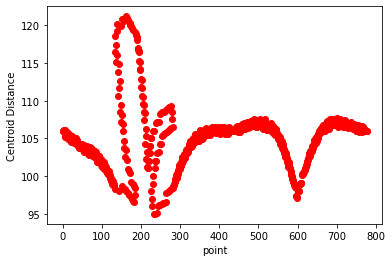

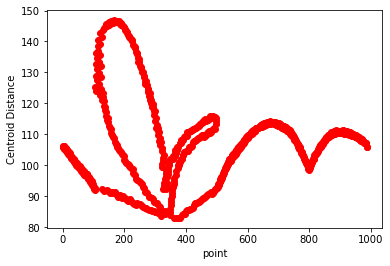

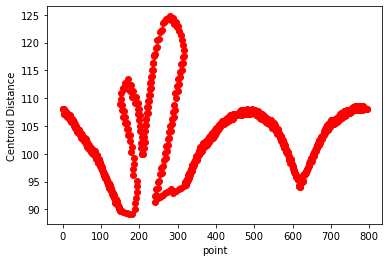

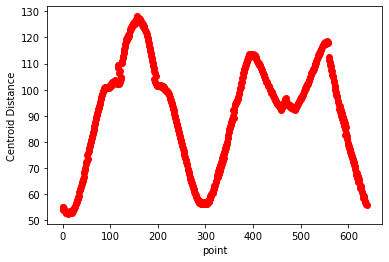

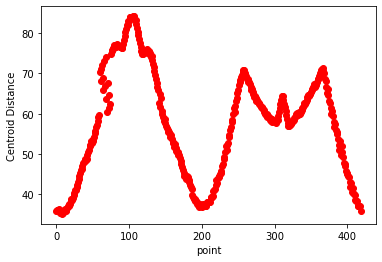

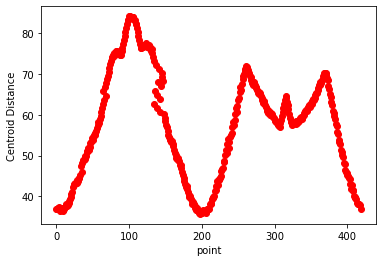

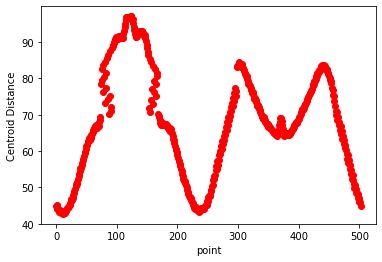

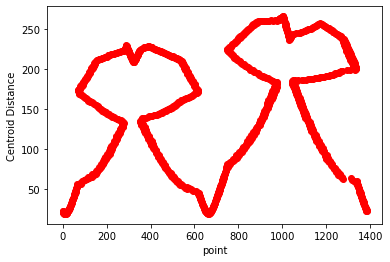

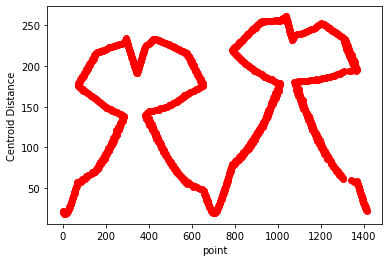

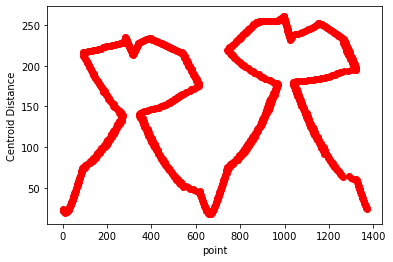

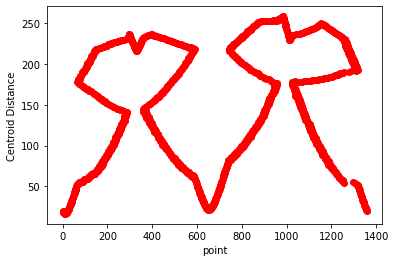

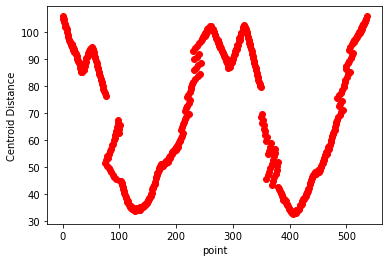

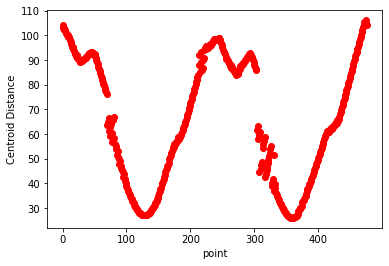

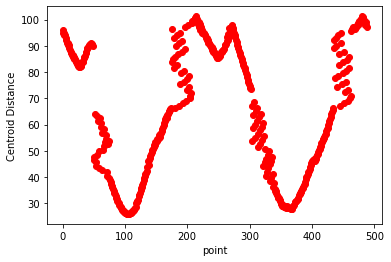

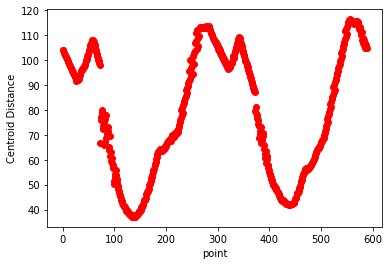

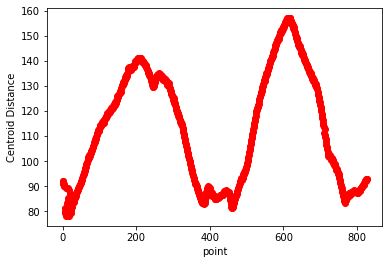

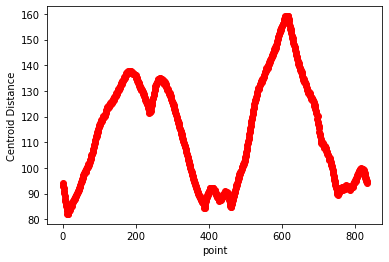

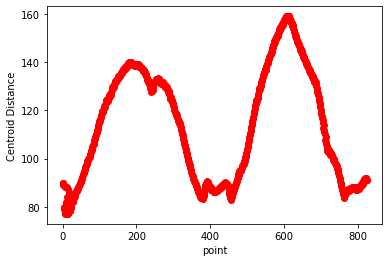

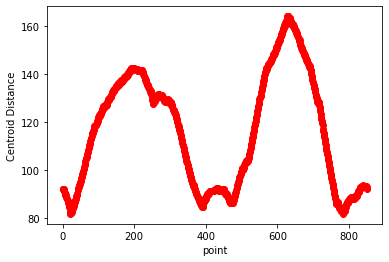

In [8]:
for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    plt.plot(x1, featureVectors[i], 'o', color ="red")  
    plt.show()

## Template-Based Matching

For template-based matching, our template will be an image of an apple with a bite taken out of it

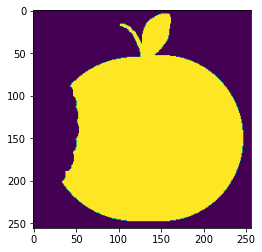

In [9]:
t = cv.imread("images/template.jpg", 0)
ret,template = cv.threshold(t,127,255,0)

plt.figure()
plt.imshow(template)

Create feature vector for template

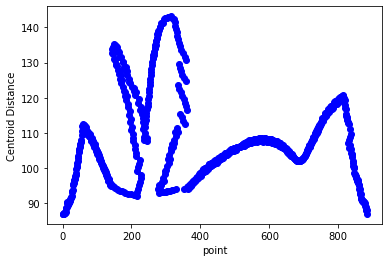

In [10]:
Mt = cv.moments(template)
cXt = int(Mt["m10"] / Mt["m00"])
cYt = int(Mt["m01"] / Mt["m00"])

templateEdges = cv.Canny(template,100,200)

templateEdgeCoordinates = []
templateAngles = []
templateFeatureVector = []

for j in range(templateEdges.shape[0]):
    for k in range(templateEdges.shape[1]):
        if templateEdges[j,k] == 255:
            templateEdgeCoordinates.append([j,k])

for j in templateEdgeCoordinates:
    templateAngles.append(math.atan2(j[0] - cYt, j[1] - cXt))
    
templateAngles, templateEdgeCoordinates = (list(t) for t in zip(*sorted(zip(templateAngles, templateEdgeCoordinates))))

for j in templateEdgeCoordinates:
    templateFeatureVector.append(np.sqrt((j[0]-cYt)**2 + (j[1]-cXt)**2))
    
x1 = np.arange(0, len(templateFeatureVector))
plt.xlabel("point")  
plt.ylabel("Centroid Distance")  
plt.plot(x1, templateFeatureVector, 'o', color ="blue")  
plt.show()

Compute distance time warping matrix for each image and get distance from each

In [11]:
dtw_template =  np.empty(20, dtype=object)
distance_template = np.zeros(20)

for i in range(20):
    n, m = len(featureVectors[i]), len(templateFeatureVector)
    dtw_template[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_template[i][k, l] = np.inf
    dtw_template[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(featureVectors[i][k-1] - templateFeatureVector[0])
        last_min = dtw_template[i][k-1, 0]
        dtw_template[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(featureVectors[i][0] - templateFeatureVector[l-1])
        last_min = dtw_template[i][0, l-1]
        dtw_template[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(featureVectors[i][k-1] - templateFeatureVector[l-1])
            last_min = np.min([dtw_template[i][k-1, l], dtw_template[i][k, l-1], dtw_template[i][k-1, l-1]])
            dtw_template[i][k, l] = cost + last_min
    
    distance_template[i] = dtw_template[i][n, m]

Follow each image's warping path and show their alignments to the template

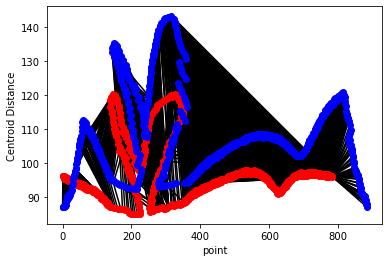

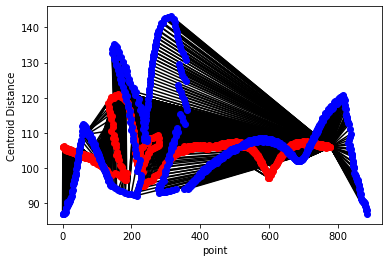

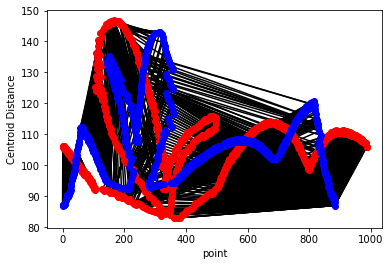

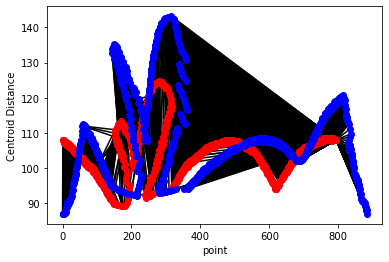

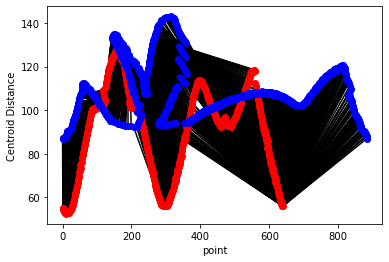

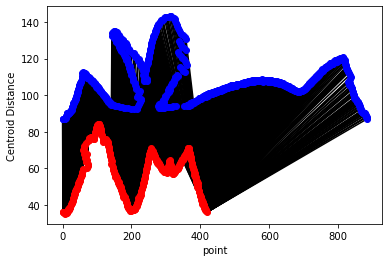

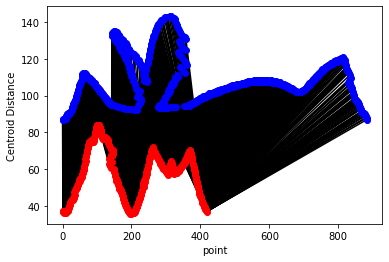

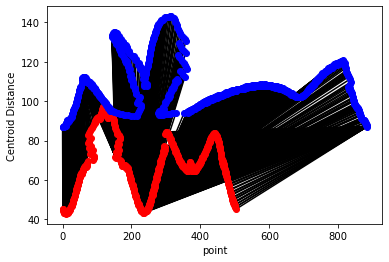

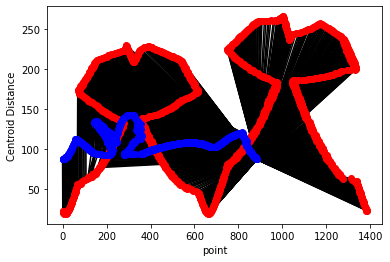

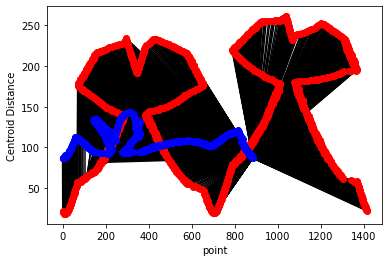

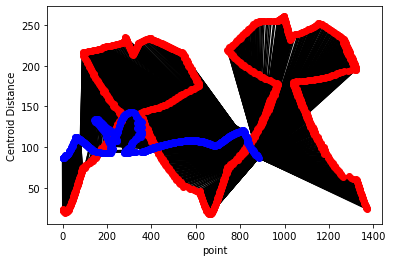

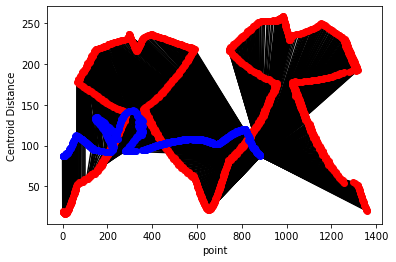

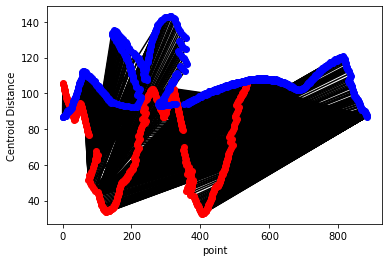

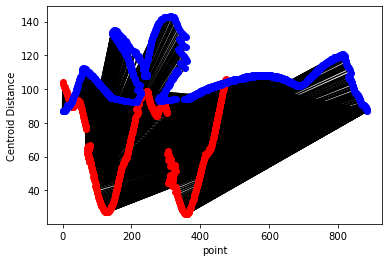

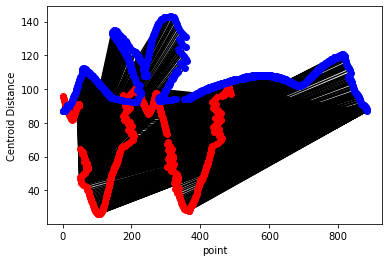

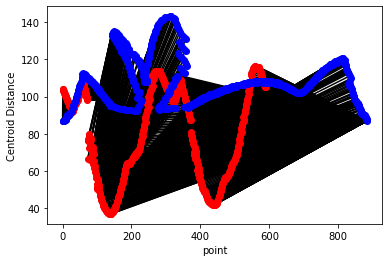

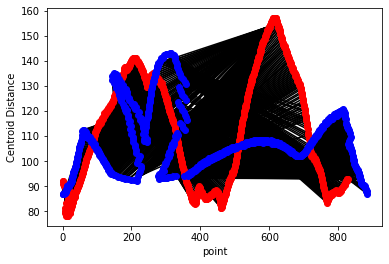

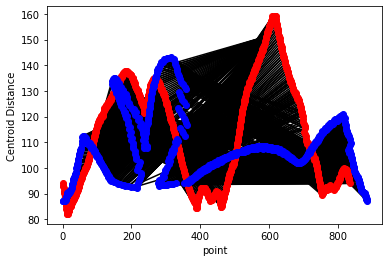

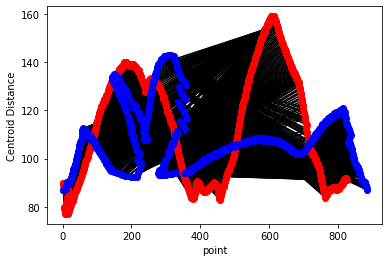

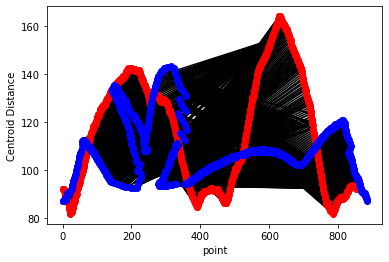

In [27]:
for i in range(0,20):
    x1 = np.arange(0, len(featureVectors[i]))
    x2 = np.arange(0, len(templateFeatureVector))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')

    while k < len(dtw_template[i])-2 or l < len(dtw_template[i][0])-2:
        if k == len(dtw_template[i])-2:
            l += 1
        elif l == len(dtw_template[i][0])-2:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k+1, l]:
            k += 1
        elif np.min([dtw_template[i][k+1, l], dtw_template[i][k, l+1], dtw_template[i][k+1, l+1]]) == dtw_template[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[featureVectors[i][k],templateFeatureVector[l]],'k-')
                   
    plt.plot(x1, featureVectors[i], 'o', color ="red") 
    plt.plot(x2, templateFeatureVector, 'o', color ="blue")         

    plt.show()

Print each image's distance from template

In [12]:
print("Apple distances")    
print("apple1:",distance_template[0])
print("apple2:",distance_template[1])
print("apple3:",distance_template[2])
print("apple4:",distance_template[3])
print("") 

print ("Bell distances")    
print("bell1:",distance_template[4])
print("bell2:",distance_template[5])
print("bell3:",distance_template[6])
print("bell4:",distance_template[7])
print("") 

print ("Bone distances")   
print("bone1:",distance_template[8])
print("bone2:",distance_template[9])
print("bone3:",distance_template[10])
print("bone4:",distance_template[11])
print("") 

print ("Brick distances")
print("brick1:",distance_template[12])
print("brick2:",distance_template[13])
print("brick3:",distance_template[14])
print("brick4:",distance_template[15])
print("") 

print ("Face distances")
print("face1:",distance_template[16])
print("face2:",distance_template[17])
print("face3:",distance_template[18])
print("face4:",distance_template[19])
print("")                    

Apple distances
apple1: 5585.0193262044995
apple2: 4967.201616647234
apple3: 6465.76003436081
apple4: 4856.547811052146

Bell distances
bell1: 9004.356456226189
bell2: 32198.44067337568
bell3: 32218.161575774906
bell4: 20217.009207969168

Bone distances
bone1: 80096.79207502569
bone2: 81148.88887022562
bone3: 78551.46512012368
bone4: 78738.9998758189

Brick distances
brick1: 19142.211687773804
brick2: 18918.021391108956
brick3: 20194.454537561967
brick4: 15863.364965411743

Face distances
face1: 7209.368143064576
face2: 6859.627775315103
face3: 7202.864723068406
face4: 7721.143837707911



Print ranking of each image.
The template is most similar to apple4.
Apples come in first, faces come in second, bricks and bells tie for third, and bones are last.

In [13]:
temp = distance_template.argsort()
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(distance_template))

print("Apple ranks")    
print("apple1:",ranks[0])
print("apple2:",ranks[1])
print("apple3:",ranks[2])
print("apple4:",ranks[3])
print("") 

print ("Bell ranks")    
print("bell1:",ranks[4])
print("bell2:",ranks[5])
print("bell3:",ranks[6])
print("bell4:",ranks[7])
print("") 

print ("Bone ranks")   
print("bone1:",ranks[8])
print("bone2:",ranks[9])
print("bone3:",ranks[10])
print("bone4:",ranks[11])
print("") 

print ("Brick ranks")
print("brick1:",ranks[12])
print("brick2:",ranks[13])
print("brick3:",ranks[14])
print("brick4:",ranks[15])
print("") 

print ("Face ranks")
print("face1:",ranks[16])
print("face2:",ranks[17])
print("face3:",ranks[18])
print("face4:",ranks[19])
print("")     

Apple ranks
apple1: 2
apple2: 1
apple3: 3
apple4: 0

Bell ranks
bell1: 8
bell2: 14
bell3: 15
bell4: 13

Bone ranks
bone1: 18
bone2: 19
bone3: 16
bone4: 17

Brick ranks
brick1: 11
brick2: 10
brick3: 12
brick4: 9

Face ranks
face1: 6
face2: 4
face3: 5
face4: 7



## Feature-Based Matching

For feature based matching, the first image in each class will be compared to all other objects in the same class.
We create two arrays of feature vectors, one with the first objects in each class and one with all other objects in each class.

In [14]:
fbVectors = [featureVectors[1], featureVectors[2], featureVectors[3], 
            featureVectors[5], featureVectors[6], featureVectors[7],
            featureVectors[9], featureVectors[10], featureVectors[11],
            featureVectors[13], featureVectors[14], featureVectors[15],
            featureVectors[17], featureVectors[18], featureVectors[19]]
comparisonVectors = [featureVectors[0], featureVectors[0], featureVectors[0], 
                     featureVectors[4], featureVectors[4], featureVectors[4],
                     featureVectors[8], featureVectors[8], featureVectors[8],
                     featureVectors[12], featureVectors[12], featureVectors[12],
                     featureVectors[16], featureVectors[16], featureVectors[16]]

Compute distance time warping matrix for each image and get distance from each

In [15]:
dtw_feature =  np.empty(15, dtype=object)
distance_feature = np.zeros(15)

for i in range(15):
    n, m = len(fbVectors[i]), len(comparisonVectors[i])
    dtw_feature[i] = np.zeros((n+1, m+1))
    for k in range(n+1):
        for l in range(m+1):
            dtw_feature[i][k, l] = np.inf
    dtw_feature[i][0, 0] = 0
    
    for k in range(1, n+1):
        cost = abs(fbVectors[i][k-1] - comparisonVectors[i][0])
        last_min = dtw_feature[i][k-1, 0]
        dtw_feature[i][k, 0] = cost + last_min
        
    for l in range(1, m+1):
        cost = abs(fbVectors[i][0] - comparisonVectors[i][l-1])
        last_min = dtw_feature[i][0, l-1]
        dtw_feature[i][0, l] = cost + last_min
    
    for k in range(1, n+1):
        for l in range(1, m+1):
            cost = abs(fbVectors[i][k-1] - comparisonVectors[i][l-1])
            last_min = np.min([dtw_feature[i][k-1, l], dtw_feature[i][k, l-1], dtw_feature[i][k-1, l-1]])
            dtw_feature[i][k, l] = cost + last_min
    
    distance_feature[i] = dtw_feature[i][n, m]

Follow each image's warping path and show their alignment to the class' first image

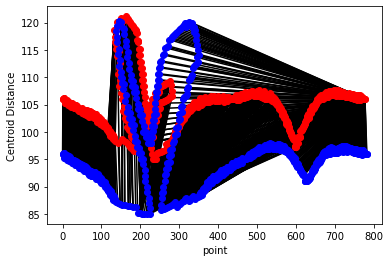

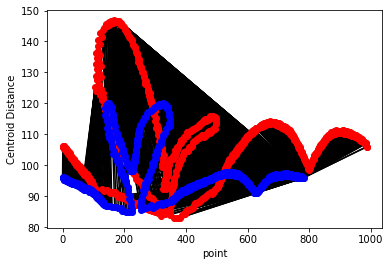

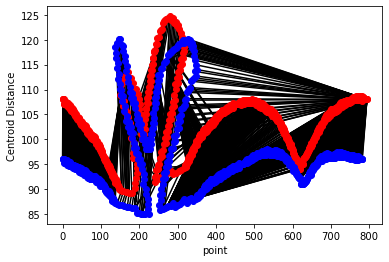

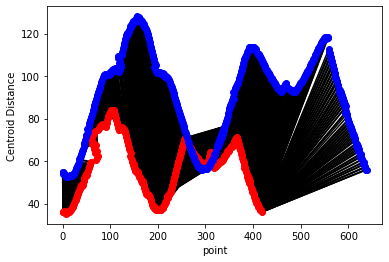

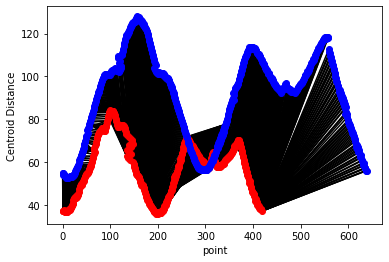

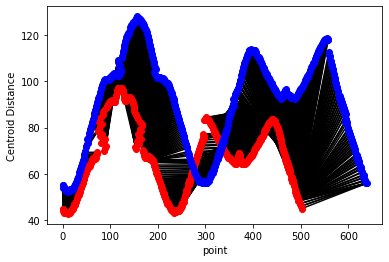

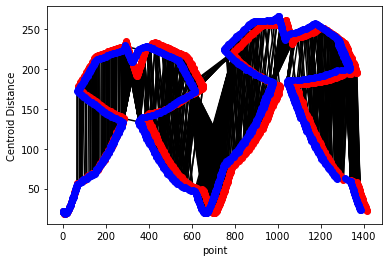

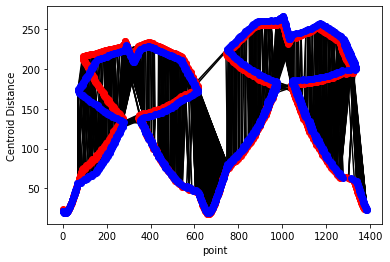

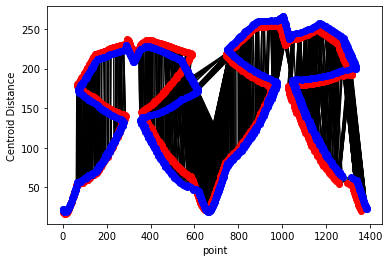

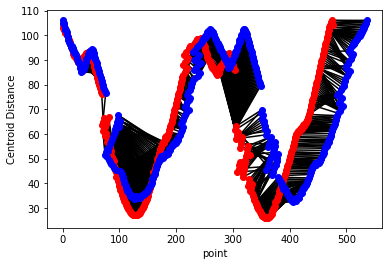

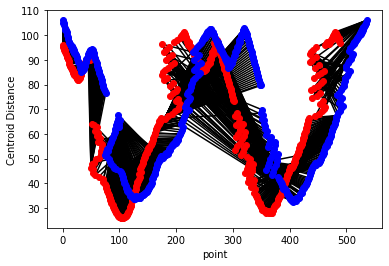

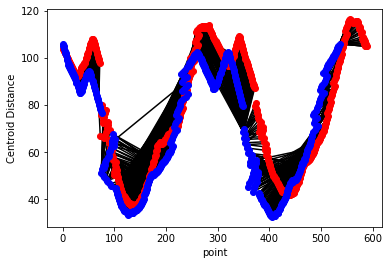

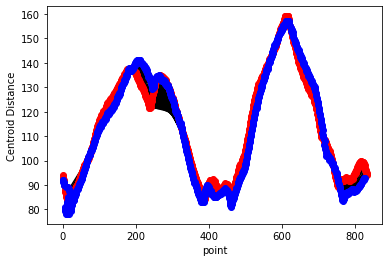

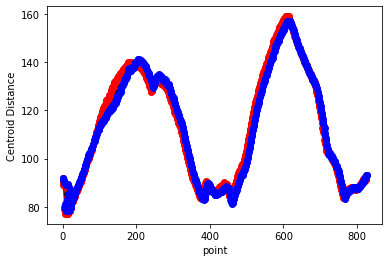

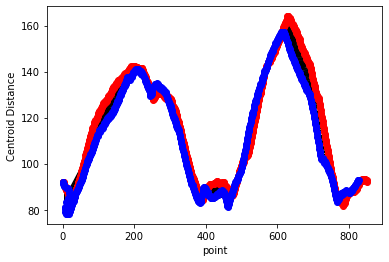

In [28]:
for i in range(0,15):
    x1 = np.arange(0, len(fbVectors[i]))
    x2 = np.arange(0, len(comparisonVectors[i]))
    plt.xlabel("point")  
    plt.ylabel("Centroid Distance")  
    
    k = 0
    l = 0
    plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')

    while k < len(dtw_feature[i])-2 or l < len(dtw_feature[i][0])-2:
        if k == len(dtw_feature[i])-2:
            l += 1
        elif l == len(dtw_feature[i][0])-2:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k+1, l]:
            k += 1
        elif np.min([dtw_feature[i][k+1, l], dtw_feature[i][k, l+1], dtw_feature[i][k+1, l+1]]) == dtw_feature[i][k, l+1]:
            l += 1
        else:
            k += 1
            l += 1
        plt.plot([k,l],[fbVectors[i][k],comparisonVectors[i][l]],'k-')
                   
    plt.plot(x1, fbVectors[i], 'o', color ="red") 
    plt.plot(x2, comparisonVectors[i], 'o', color ="blue")         

    plt.show()

Print each distance comparison.
The faces are most similar to face1, followed by the bricks, apples, bells, then bones.

In [16]:
print("Apple distances")    
print("apple2:",distance_feature[0])
print("apple3:",distance_feature[1])
print("apple4:",distance_feature[2])
print("")

print ("Bell distances")    
print("bell2:",distance_feature[3])
print("bell3:",distance_feature[4])
print("bell4:",distance_feature[5])
print("")

print ("Bone distances")   
print("bone2:",distance_feature[6])
print("bone3:",distance_feature[7])
print("bone4:",distance_feature[8])
print("") 

print ("Brick distances")
print("brick2:",distance_feature[9])
print("brick3:",distance_feature[10])
print("brick4:",distance_feature[11])
print("") 

print ("Face distances")
print("face2:",distance_feature[12])
print("face3:",distance_feature[13])
print("face4:",distance_feature[14])
print("") 

Apple distances
apple2: 5721.6851821053715
apple3: 9207.550448840304
apple4: 4552.660533428943

Bell distances
bell2: 13091.455458274804
bell3: 13095.115188675018
bell4: 8031.906357051964

Bone distances
bone2: 11450.913649918382
bone3: 15043.556183677261
bone4: 16412.291804466033

Brick distances
brick2: 1209.2872731517377
brick3: 1656.5938322095371
brick4: 2423.303185924566

Face distances
face2: 854.5691306167471
face3: 288.3837978981007
face4: 646.3312384413423

